In [10]:
# Git clone and run tests on updates branch
!git clone https://github.com/ultralytics/ultralytics -b main
%pip install -qe ultralytics

fatal: destination path 'ultralytics' already exists and is not an empty directory.
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done


In [11]:
import zipfile
from google.colab import drive
drive.mount('/content/drive/')
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Rock-paper-scissors.v2i.yolov11.zip", 'r')
!unzip "/content/drive/MyDrive/Rock-paper-scissors.v2i.yolov11.zip"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Archive:  /content/drive/MyDrive/Rock-paper-scissors.v2i.yolov11.zip
replace Rock-paper-scissors.v2i.yolov11/data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: Rock-paper-scissors.v2i.yolov11/data.yaml  
  inflating: Rock-paper-scissors.v2i.yolov11/README.dataset.txt  
  inflating: Rock-paper-scissors.v2i.yolov11/README.roboflow.txt  
  inflating: Rock-paper-scissors.v2i.yolov11/train/images/label_0_20220818_110327_457__jpg.rf.c2ab9724d23bab74c182c36b6599ba8c.jpg  
  inflating: Rock-paper-scissors.v2i.yolov11/train/images/label_0_20220818_110328_383__jpg.rf.3cc7a0abd436ceb653dc09511d3681e8.jpg  
  inflating: Rock-paper-scissors.v2i.yolov11/train/images/label_0_20220818_110329_878__jpg.rf.67c6393435aeebdb77b36372408c55ff.jpg  
  inflating: Rock-paper-scissors.v2i.yolov11/train/images/label_0_20220818_110332_875__jpg.rf.329d3ec1358080b80b24cfc8

In [12]:
!yolo train model=yolo11n.pt data=/content/Rock-paper-scissors.v2i.yolov11/data.yaml epochs=10 imgsz=640

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Rock-paper-scissors.v2i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

In [17]:
!yolo predict model=ultralytics/runs/detect/train2/weights/last.pt source='Rock-paper-scissors.v2i.yolov11/train/images/label_0_20220818_110327_457__jpg.rf.c2ab9724d23bab74c182c36b6599ba8c.jpg'

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/Rock-paper-scissors.v2i.yolov11/train/images/label_0_20220818_110327_457__jpg.rf.c2ab9724d23bab74c182c36b6599ba8c.jpg: 640x640 1 Rock, 72.1ms
Speed: 5.1ms preprocess, 72.1ms inference, 146.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/ultralytics/runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [14]:
!pip install matplotlib

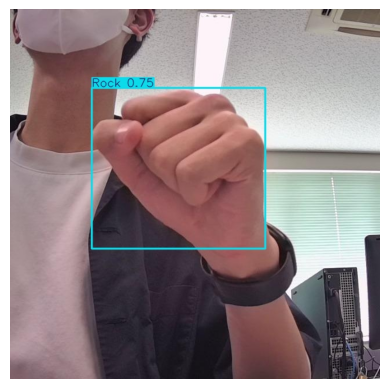

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/ultralytics/runs/detect/predict3/label_0_20220818_110327_457__jpg.rf.c2ab9724d23bab74c182c36b6599ba8c.jpg') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()